<a href="https://colab.research.google.com/github/mr18013/house_prices_team_challenge/blob/master/Copy_of_Team_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, we need to grab the Git from GitHub. This will then be used to retrieve all our data.

In [13]:
! git clone https://github.com/samuel-engel/house_prices_team_challenge.git

fatal: destination path 'house_prices_team_challenge' already exists and is not an empty directory.


Next, our Python script imports the modules we intend to use. These include:

*   numpy, a numerical and array module
*   pandas, a data analysis module which includes functions for loading CSV files
*   matplotlib.pyplot, for plotting and rendering graphs
*   seaborn, a plotting library that is built on top of matplotlib for ease of use
*   scikit-learn (imports as sklearn), a machine learning library to use the data generated and return the result







In [0]:
# math and data science
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from scipy.stats import norm

In [15]:
from subprocess import check_output
print(check_output(["ls", "house_prices_team_challenge/house-prices-data"]).decode("utf8"))

data_description.txt
sample_submission.csv
test.csv
train.csv



Here, we load in the training data for the house prices.

In [0]:
# default path for accesing the data
path = 'house_prices_team_challenge/house-prices-data/'


In [17]:
train_data = pd.read_csv(path + '/train.csv')
train_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
# check for duplicate IDs
unique_ids = len(set(train_data.Id))
total_ids = train_data.shape[0]
duplicate_ids = total_ids - unique_ids
print("Duplicate IDs: " + str(duplicate_ids))

# save id column
train_data_id = train_data['Id']
# temporarily drop the id column 
train_data.drop(['Id'], axis = 1, inplace = True)


Duplicate IDs: 0


At this point, having had a read through of the data_description.txt file, we notice a number of categories that have no numerical values, but DO have discrete entries which we can convert into numerical data. There's no easy way to do this, so lets just blast through and get it sorted.

In [19]:
# conversion from text to integral
zoning = {"A":0, "C":1, "FV":2, "I":3, "RH":4, "RL":5, "RP":6, "RM":7}
street = {"NA":0, "Grvl":1, "Pave":2}
shape  = {"Reg":0, "IR1":1, "IR2":2, "IR3":3}
contour= {"Lvl":0, "Bnk":1, "HLS":2, "Low":3}
utils  = {"AllPub":0, "NoSewr":1, "NoSeWa": 2, "ELO":3}
config = {"Inside":0, "Corner":1, "CulDSac":2, "FR2":3, "FR3":4}
slope  = {"Gtl":0, "Mod":1, "Sev":2}
neighbr= {"Blmngtn": 0, "Blueste":1, "BrDale":2, "BrkSide":3, "ClearCr":4, "CollgCr":5, "Crawfor": 6, "Edwards":7, "Gilbert":8, "IDOTRR":9, "MeadowV":10, "Mitchel":11, "Names":12, "NoRidge":13, "NPkVill":14, "NridgHt":15, "NWAmes":16, "OldTown":17, "SWISU":18, "Sawyer":19, "SawyerW":20, "Somerst":21, "StoneBr":22, "Timber":23, "Veenker":24}
condit = {"Artery":0, "Feedr":1, "Norm":2, "RRNn":3, "RRAn":4, "PosN":5, "PosA":6, "RRNe":7, "RRAe":8}
bldtype= {"1Fam":0, "2FmCon":1, "Duplx":2, "TwnhsE":3, "TwnhsI":4}
hsstyle= {"1Story":0, "1.5Fin":1, "1.5Unf":2, "2Story":3, "2.5Fin":4, "2.5Unf":5, "SFoyer":6}
roofst = {"Flat":0, "Gable":1, "Gambrel":2, "Hip":3, "Mansard":4, "Shed":5}
roofmtl= {"ClyTile":0, "CompShg":1, "Membran":2, "Metal":3, "Roll":4, "Tar&Gvl":5, "WdShake":6, "WdShngl":7}
exter  = {"AsbShng":0, "AsphShn":1, "BrkComm":2, "BrkFace":3, "CBlock":4, "CemntBd":5, "HdBoard":6, "ImStucc":7, "MetalSd":8, "Other":9, "Plywood":10, "PreCast":11, "Stone":12, "Stucco":13, "VinylSd":14, "Wd Sdng":15, "WdShing":16}
veneer = {"BrkCmn": 0, "BrkFace":1, "CBlock":2, "None":3, "Stone":4}
qualcon= {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4, "NA":5}
expose = {"Gd":0, "Av":1, "Mn":2, "No":3, "NA":4}
finish = {"GLQ":0, "ALQ":1, "BLQ":2, "Rec":3, "LwQ":4, "Unf":5, "NA":6}
heating= {"Floor":0, "GasA":1, "GasW":2, "Grav":3, "OthW":4, "Wall":5}
centair= {"N":0, "Y":1}
electr = {"SBrkr":0, "FuseA":1, "FuseF":2, "FuseP":3, "Mix":4}
funct  = {"Typ":0, "Min1":1, "Min2":2, "Mod":3, "Maj1":4, "Maj2":5, "Sev":6, "Sal":7}
garage = {"2Types":0, "Attchd":1, "Basement":2, "BuiltIn":3, "CarPort":4, "Detchd":5, "NA": 6}
grgfin = {"Fin":0, "RFn":1, "Unf":2, "NA":3}
pavedrv= {"Y":0, "P":1, "N":2}

print(train_data["MSZoning"][1])



RL


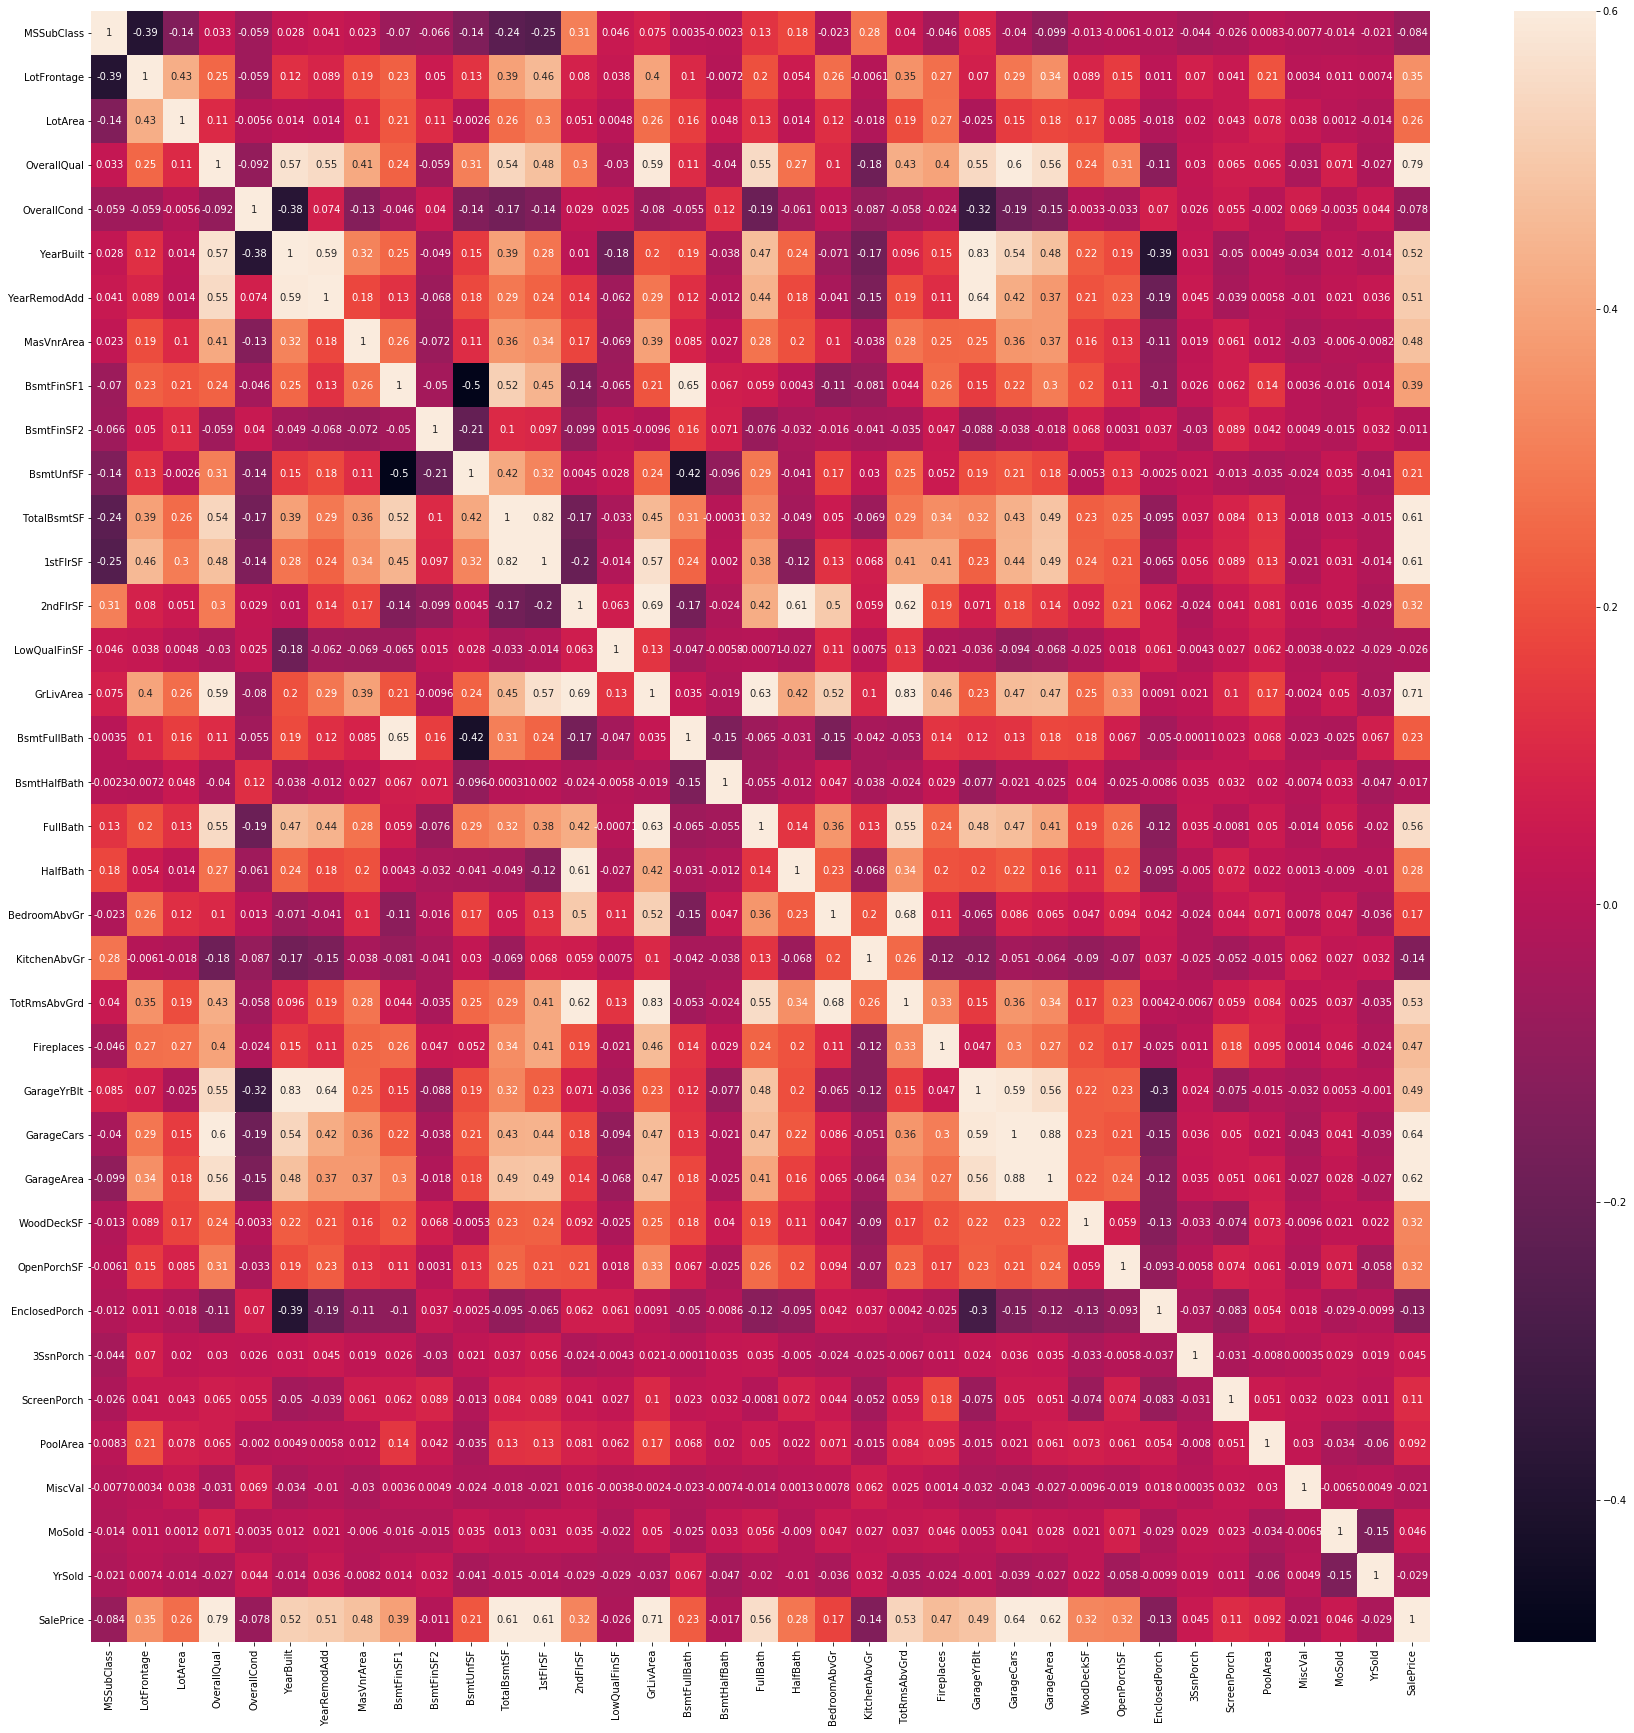

In [0]:
correlation_matrix = train_data.corr()
plt.subplots(figsize=(30, 30))
# plt.margins(y = 0.8)
sns.heatmap(correlation_matrix, vmax=0.6, annot=True);

Taking the above data into account, we grab any categories that have a higher correlation with SalePrice than 0.5 and map them. The next task would be to look for values that have a high correlation with each other, as they are likely to affect SalePrice equally (such as 1stFlSF and TotalBsmtSF). We only need to take into account one of these, as they are likely to effectively be the same thing.

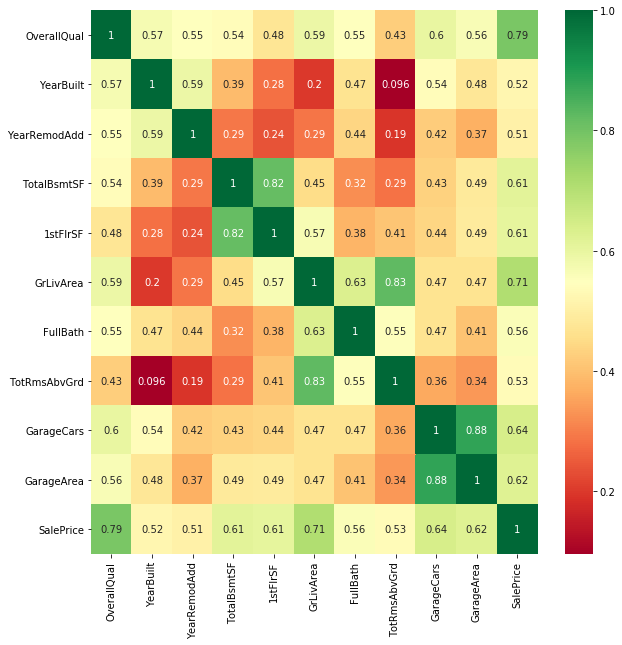

In [0]:
correlation_matrix = train_data.corr()
top_features = correlation_matrix.index[abs(correlation_matrix["SalePrice"])>0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[top_features].corr(), annot=True, cmap="RdYlGn")

This code shows the most correlated features 

In [0]:
k = 10
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


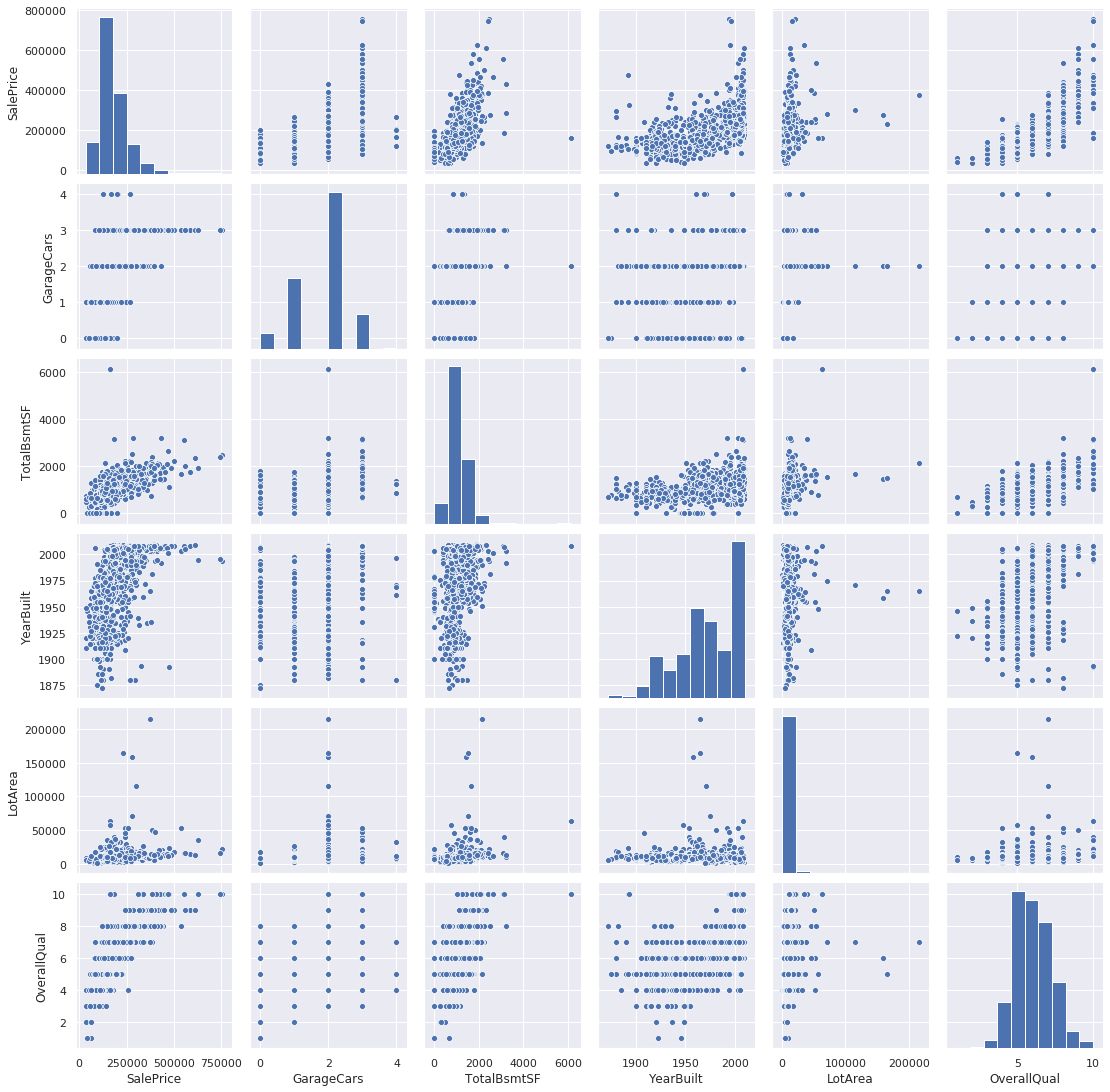

In [0]:
sns.set()
value = ['SalePrice', 'GarageCars','TotalBsmtSF', 'YearBuilt', 'LotArea', 'OverallQual']
sns.pairplot(train_data[value], height = 2.5)
plt.show();

Text(0.5, 0, 'House Index (?)')

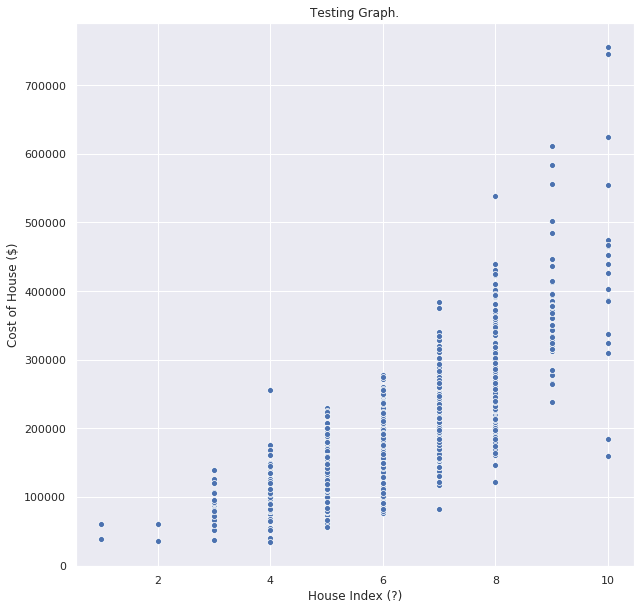

In [0]:
trainhead_data = train_data.head()

plt.figure(figsize=(10,10))
plt.title("Testing Graph.")
sns.scatterplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.ylabel("Cost of House ($)")
plt.xlabel("House Index (?)")


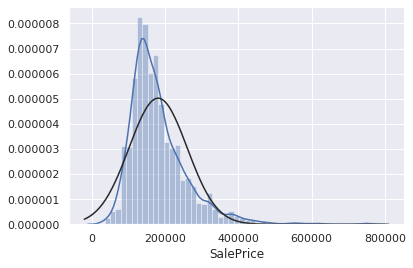

In [0]:
sns.distplot(train_data["SalePrice"],fit=norm);


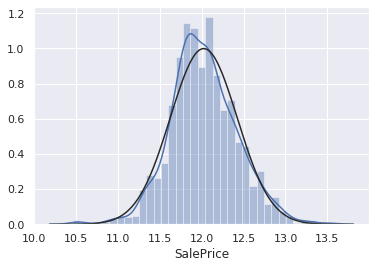

In [0]:
target=np.log(train_data["SalePrice"]);
sns.distplot(target,fit=norm);

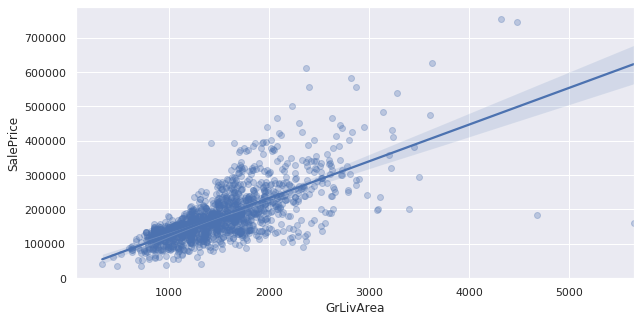

In [0]:
plt.figure(figsize=(10,5))
sns.regplot(train_data.GrLivArea, train_data.SalePrice, scatter_kws={"alpha":0.3})
plt.show()

In [0]:
train_data.drop(train_data[(train_data['GrLivArea']>4000) 
                         & (train_data['SalePrice']<300000)].index , inplace=True)

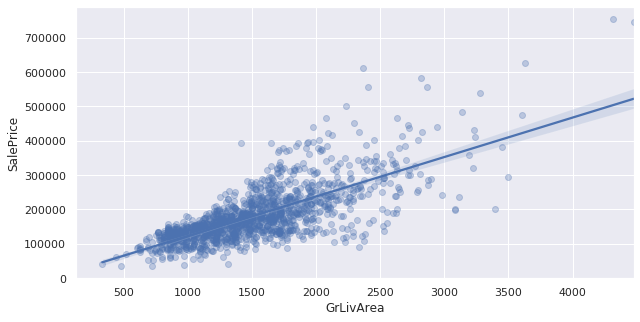

In [0]:
plt.figure(figsize=(10,5))
sns.regplot(train_data.GrLivArea, train_data.SalePrice, scatter_kws={"alpha":0.3})
plt.show()

I've created a table showing the variables that are kind of useless so we need to delete the variables that could affect the price of the house

In [0]:
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data.head(20)


,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


I've deleted all the data from above because it is irelevant and it contains some missing data, so it won't bother us

In [0]:
train_data=train_data.drop((data[data['Total'] > 1]).index,1)
train_data=train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)
train_data.isnull().sum().max()


0

This is the result after the deletion


In [0]:
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data.head(20)

,Total,Percent
SalePrice,0,0.0
OverallCond,0,0.0
TotalBsmtSF,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior2nd,0,0.0


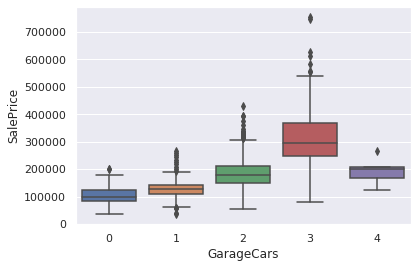

In [0]:
x=train_data['GarageCars']
y=train_data['SalePrice']
sns.boxplot(x,y)

Deleting unecesry data regarding Sale Price and Size of the Garage Car cpacity variables

In [0]:
train_data=train_data.drop(train_data[(train_data['GarageCars']>3) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

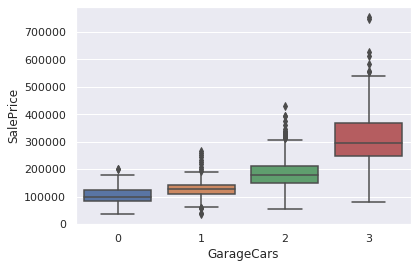

In [0]:
x=train_data['GarageCars']
y=train_data['SalePrice']
sns.boxplot(x, y)

Trying to remove the bottom dots


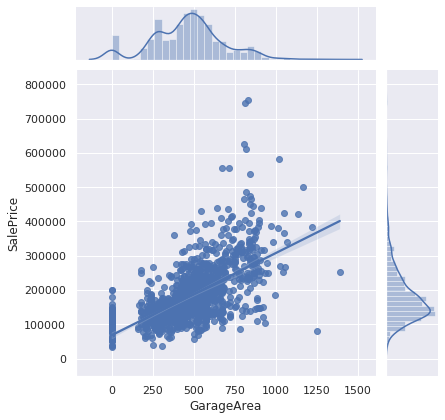

In [0]:
x=train_data['GarageArea']
y=train_data['SalePrice']
sns.jointplot(x, y, kind='reg')

Deeleting the unecesry data regarding Garage Area and Sale Price

In [0]:
train_data=train_data.drop(train_data[(train_data['GarageArea']>1000) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

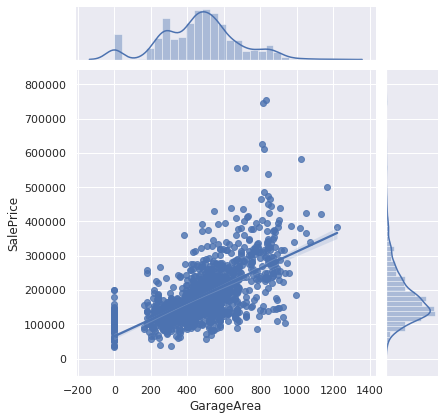

In [0]:
x=train_data['GarageArea']
y=train_data['SalePrice']
sns.jointplot(x, y, kind='reg')

This look ok-ish comparing Sale Price with Total Square feet of basement

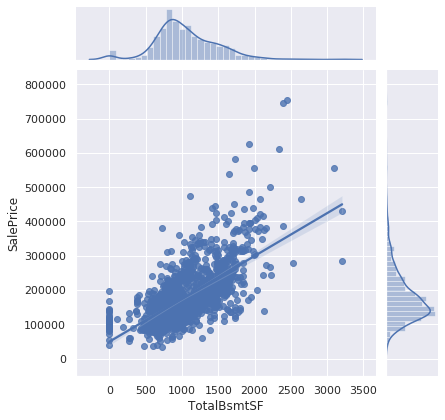

In [0]:
x=train_data['TotalBsmtSF']
y=train_data['SalePrice']
sns.jointplot(x, y, kind='reg')

Analazing the Sale Price of Houses for every year 

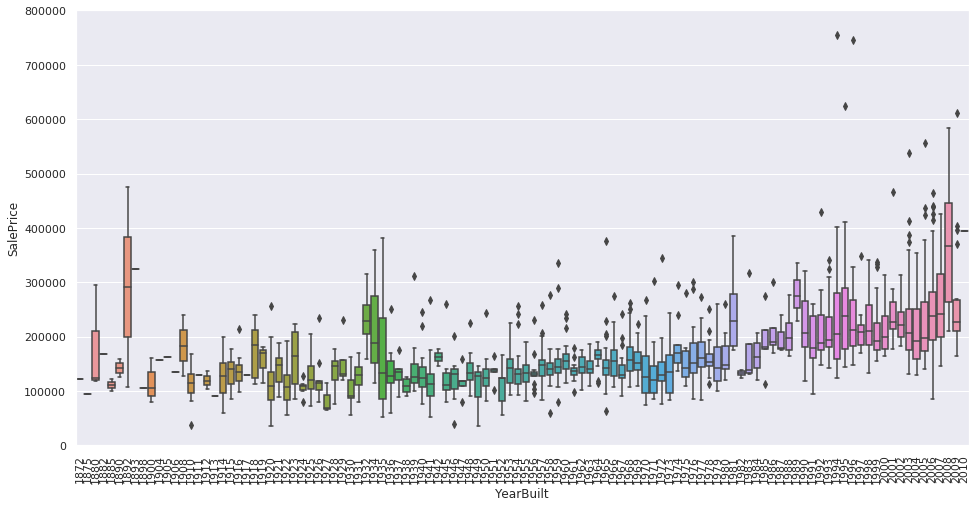

In [0]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);